In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


## Model Exercises

## <u>Decision Tree exercises</u>
### Exercise 1) <br> Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- What is your baseline prediction? 
- What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
- When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
# read titanic data from acquire
titanic = acquire.new_titanic_data()

In [3]:
#from prepare.py take in the titanic dataset and us the clean_titanic_data on this fresh data set
#had originally found NaN within age...
train, validate, test =prepare.prepare_titanic_data(titanic)
train.isna().sum()

survived                    0
pclass                      0
sex                         0
age                         0
sibsp                       0
parch                       0
fare                        0
embark_town                 0
alone                       0
pclass                      0
sibsp                       0
parch                       0
alone                       0
sex_male                    0
embark_town_Queenstown      0
embark_town_Southampton     0
embark_town_Southhampton    0
dtype: int64

In [4]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,pclass,sibsp,parch,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0,1,1,0,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,3,0,2,0,1,0,1,0
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,3,4,1,0,1,0,1,0
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,2,0,1,0,0,0,1,0
306,1,1,female,29.699118,0,0,110.8833,Cherbourg,1,1,0,0,1,0,0,0,0


In [5]:
#removed the columns from each df (train, validate, test)not needed (duplicated info)
train = train.drop(columns=['sex', 'embark_town'])
validate = validate.drop(columns=['sex', 'embark_town'])
test = test.drop(columns=['sex', 'embark_town'])

Setting up our train_validate_test...

In [6]:
#let's do our train/validate/test split
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


Splitting data into train, validate and test

In [7]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

*Q: WHAT IS YOUR BASELINE PREDICTION?

In [8]:
#finding baseline
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

 -  <b> Baseline variable == Not Survived </b>

In [9]:
train['baseline_prediction'] = 0
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
baseline_accuracy

0.6164658634538153

### Exercise 2) <br> Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

- Creating the decision tree object :

In [10]:
#creating that decision tree!

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

- Fit the model:

In [11]:
# model.fit(X, y)
clf = clf.fit(X_train, y_train)

- Visualize a decision tree

[Text(390.6, 317.09999999999997, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(195.3, 190.26, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(97.65, 63.420000000000016, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(292.95000000000005, 63.420000000000016, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(585.9000000000001, 190.26, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(488.25, 63.420000000000016, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = 0'),
 Text(683.5500000000001, 63.420000000000016, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]\nclass = 0')]

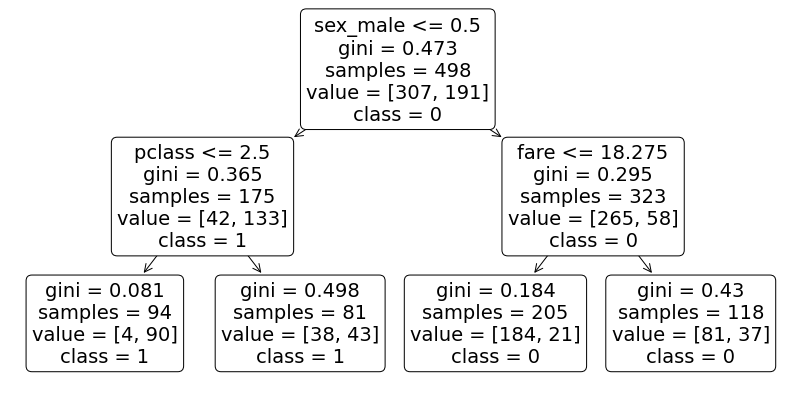

In [12]:
plt.figure(figsize=(14, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [13]:
### Make Predictions
y_pred=clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [14]:
### Estimate Probability
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.04255319, 0.95744681],
       [0.04255319, 0.95744681]])

### Exercise 3) <br> Evaluate your in-sample results using the model score, confusion matrix, and classification report.

- Evaluating the model with a Model Score

In [15]:
print('Accuracy of Decision Tree classifier on titanic training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on titanic training set: 0.80


- Evaluating the model with the Confusion Matrix

In [16]:
# let's make a confusion matrix
confusion_matrix(y_train, y_pred)

array([[265,  42],
       [ 58, 133]])

In [17]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [18]:
import pandas as pd
#creating a dataframe to see the matrix/needed to rename as variables were still 0 and 1
labels = ('Not Survived 0', 'Survived 1')

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,Not Survived 0,Survived 1
Not Survived 0,265,42
Survived 1,58,133


- Evaluating with a classification report

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



### Exercise 4) <br> Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [20]:
TP = 265
FP = 58
FN = 42
TN = 133
ALL = TP + FP + FN + TN

In [21]:
#accuracy: shows in classification report above:
0.80

0.8

In [22]:
#True Positive rate: TP/(TP+FN)
265/(265+58)

0.8204334365325078

In [23]:
#False positive rate: FP/(FP+TN)
42/(42+133)

0.24

In [24]:
#True negative rate: TN/(TN+)


In [25]:
#False negative rate: FN/(FN+)

In [26]:
#Precision rate: 

In [27]:
#Recall rate:

In [28]:
#f1-score rate:

In [29]:
#support rate:

### Exercise 5) <br> Run through steps 2-4 using a different max_depth value.

In [30]:
#let's create a loop for this:

In [31]:
clf1 = DecisionTreeClassifier(max_depth=4, random_state=123)
clf1 = clf1.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on titanic training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on titanic training set: 0.84


In [32]:
clf2 = DecisionTreeClassifier(max_depth=8, random_state=123)
clf2 = clf2.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on titanic training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on titanic training set: 0.90


### Exercise 6) <br> Which model performs better on your in-sample data?

In [33]:
model1_train_accuracy=clf1.score(X_train, y_train)
model2_train_accuracy=clf2.score(X_train, y_train)

print("Model 1 Score:", model1_train_accuracy)
print("Model 2 Score:", model2_train_accuracy)

Model 1 Score: 0.8353413654618473
Model 2 Score: 0.8975903614457831


### Exercise 7) Which model performs best on your out-of-sample data, the validate set?

In [34]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)
clf1 = clf1.fit(X_validate, y_validate)
print('Accuracy of Decision Tree classifier on titanic training set: {:.2f}'
      .format(clf1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on titanic training set: 0.83


In [35]:
clf2 = DecisionTreeClassifier(max_depth=8, random_state=123)
clf2 = clf2.fit(X_validate, y_validate)
print('Accuracy of Decision Tree classifier on titanic training set: {:.2f}'
      .format(clf2.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on titanic training set: 0.95


In [36]:
model1_validate_accuracy=clf1.score(X_validate, y_validate)
model2_validate_accuracy=clf2.score(X_validate, y_validate)

print("Model 1 Score:", model1_validate_accuracy)
print("Model 2 Score:", model2_validate_accuracy)

Model 1 Score: 0.8317757009345794
Model 2 Score: 0.9532710280373832


## Telco Data:

In [37]:
# applying this to Telco data:
# read fresh telco data from acquire
telco = acquire.google_sheets()
# open up the t,v,t and push fresh data through prepare
train, validate, test = prepare.prepare_telco_data(telco)
train.isna().sum()#checking for nulls

customer_id                             0
gender                                  0
is_senior_citizen                       0
partner                                 0
dependents                              0
phone_service                           0
internet_service                        0
contract_type                           0
payment_type                            0
monthly_charges                         0
total_charges                           8
churn                                   0
tenure                                  0
gender_Male                             0
dependents_Yes                          0
partner_Yes                             0
contract_type_one_year                  0
contract_type_two_years                 0
payment_type_Credit card (automatic)    0
payment_type_Electronic check           0
payment_type_Mailed check               0
dtype: int64

In [38]:
#total_charges has some NaT s. Let's fill them with the mean()of total_charges:
train['total_charges'] = train.total_charges.fillna(train.total_charges.mean())

In [39]:
train.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,churn,tenure,gender_Male,dependents_Yes,partner_Yes,contract_type_one_year,contract_type_two_years,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,7503-MIOGA,Female,1,Yes,No,2,1,two_years,Bank transfer (automatic),89.85,...,No,74.5,0,0,1,0,1,0,0,0
3790,5329-KRDTM,Male,1,Yes,No,2,1,two_years,Credit card (automatic),77.35,...,No,69.8,1,0,1,0,1,1,0,0
4398,6199-IWKGC,Female,1,Yes,No,2,2,one_year,Electronic check,100.25,...,No,47.4,0,0,1,1,0,0,1,0
2635,3748-FVMZZ,Male,0,No,No,0,1,month_to_month,Electronic check,40.05,...,No,4.1,1,0,0,0,0,0,1,0
2986,4280-DLSHD,Male,0,Yes,No,1,1,month_to_month,Mailed check,54.75,...,No,8.1,1,0,1,0,0,0,0,1


In [40]:
#changing any yes/no to whole of dataframe
train = train.replace({'Yes':1, 'No':0})

In [41]:
#hadn't added encoding yet to prepare file. 
train = train.drop(columns=['customer_id',])

In [42]:
#Let's encode gender, partner, dependents, contract_type, payment_type, churn


In [43]:
train.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,gender_Male,dependents_Yes,partner_Yes,contract_type_one_year,contract_type_two_years,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,Female,1,1,0,2,1,two_years,Bank transfer (automatic),89.85,6697.35,0,74.5,0,0,1,0,1,0,0,0
3790,Male,1,1,0,2,1,two_years,Credit card (automatic),77.35,5396.25,0,69.8,1,0,1,0,1,1,0,0
4398,Female,1,1,0,2,2,one_year,Electronic check,100.25,4753.85,0,47.4,0,0,1,1,0,0,1,0
2635,Male,0,0,0,0,1,month_to_month,Electronic check,40.05,162.45,0,4.1,1,0,0,0,0,0,1,0
2986,Male,0,1,0,1,1,month_to_month,Mailed check,54.75,445.85,0,8.1,1,0,1,0,0,0,0,1


# Random Forest Exercises

### Exercise 1)
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

- Setting up data

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# read titanic data from pydatset
titanic = acquire.new_titanic_data()
#split the data into train, validate, test
train, validate, test =prepare.prepare_titanic_data(titanic)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,pclass,sibsp,parch,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0,1,1,0,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,3,0,2,0,1,0,1,0
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,3,4,1,0,1,0,1,0
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,2,0,1,0,0,0,1,0
306,1,1,female,29.699118,0,0,110.8833,Cherbourg,1,1,0,0,1,0,0,0,0


In [46]:
#dropping categorical
train = train.drop(columns=['sex', 'embark_town'])
validate = validate.drop(columns=['sex', 'embark_town'])
test = test.drop(columns=['sex', 'embark_town'])

- Separating data to get apply Random Forest using 'survived' as target

In [47]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

X_train.shape, X_validate.shape, X_test.shape

((498, 14), (214, 14), (179, 14))

- Creating a Bootstrap version of data with random samples to add in data set

In [48]:
#create the model and set max depth 10 with random_state general
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

- Fitting the RF bootstrap into the training data

In [49]:
#fit the random forest algorithm into training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [50]:
clf = RandomForestClassifier(max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on titanic training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Random Forest classifier on titanic training set: 0.97


In [51]:
#finding importance of features (higher number -> the more important/has weight to the data)
print(rf.feature_importances_)

[0.04910359 0.20879458 0.03014638 0.01982673 0.23785936 0.01097164
 0.05353124 0.03200334 0.02154846 0.01445995 0.28157762 0.01474419
 0.02480507 0.00062783]


- Checking out the statistical features

In [52]:
print('Features:')
print('pclass:0.04910359')
print('age:0.20879458')
print('sibsp:0.03014638')
print('parch:0.01982673')
print('fare:0.23785936')
print('alone:0.01097164')
print('sex:0.28157762')

Features:
pclass:0.04910359
age:0.20879458
sibsp:0.03014638
parch:0.01982673
fare:0.23785936
alone:0.01097164
sex:0.28157762


#### TAKE-AWAYS:
Age, Fare, and Sex hold the most weight when it comes to training the model to predict our baseline (who would not survive)

- Making predictions:

In [53]:
#predicting classifier for each survived/not survived probability
y_pred = rf.predict(X_train)

In [54]:
#estimating the probabiliy of not survived
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.77147863, 0.22852137],
       [0.24844444, 0.75155556],
       [0.955     , 0.045     ],
       [0.07509615, 0.92490385],
       [0.02421053, 0.97578947],
       [0.83387922, 0.16612078],
       [0.83519934, 0.16480066],
       [0.9358506 , 0.0641494 ],
       [0.94987425, 0.05012575],
       [1.        , 0.        ],
       [0.74583263, 0.25416737],
       [0.92039078, 0.07960922],
       [0.04842949, 0.95157051],
       [0.6597301 , 0.3402699 ],
       [0.87476171, 0.12523829],
       [0.62432049, 0.37567951],
       [0.95483317, 0.04516683],
       [0.05185027, 0.94814973],
       [0.6555221 , 0.3444779 ],
       [0.84153297, 0.15846703],
       [0.16420238, 0.83579762],
       [0.96362825, 0.03637175],
       [0.03142857, 0.96857143],
       [0.03704451, 0.96295549],
       [0.55270856, 0.44729144],
       [0.97499244, 0.02500756],
       [0.04625   , 0.95375   ],
       [0.76871053, 0.23128947],
       [0.73525161, 0.26474839],
       [0.93376286, 0.06623714],
       [0.

### Exercise 2) 
Evaluate your results using the model score, confusion matrix, and classification report.

In [55]:
#now let's try comparing this to a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 14 177]]


In [56]:
#a classification report of this RF model
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.93      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



### Exercise 3)
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [57]:
TP = 307
FP = 0
FN = 14
TN = 177
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9718875502008032
True Positive Rate: 0.956386292834891
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.04361370716510903
Precision: 1.0
Recall: 0.956386292834891
F1 Score: 0.9777070063694268
Support (0): 321
Support (1): 177


### Exercise 4):
Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [58]:
#Create a loop so we can easily change and auto different max_depths (will add in min_samples on the next kernel)
for i in range(2,10):
    # Make the model
    forest = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=i, 
                            random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest model with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Random Forest model with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.775194    0.936937  0.811245    0.856065      0.837228
recall       0.977199    0.544503  0.811245    0.760851      0.811245
f1-score     0.864553    0.688742  0.811245    0.776648      0.797124
support    307.000000  191.000000  0.811245  498.000000    498.000000

Random Forest model with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.817927    0.893617  0.839357    0.855772      0.846957
recall       0.951140    0.659686  0.839357    0.805413      0.839357
f1-score     0.879518    0.759036  0.839357    0.819277      0.833309
support    307.000000  191.000000  0.839357  498.000000    498.000000

Random Forest model with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.828169    0.909091  0.851406    0.868630      0.859205
recall       0.957655    0.680628  0.8

### Exercise 5) 
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

<b>My in-sample data shows that the higher max depth is the higher the  return of accuracy is </b>

In [59]:
#let's compare with validate (out-of-sample data)
depth = list(range(10,0,-1))
leaf = list(range(1,11))
metrics = []

for i in range(1,10):
    # Make the model
    forest = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf= leaf[i],
                            n_estimators=100,
                            max_depth= depth[i], 
                            random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": depth[i],
        "min_samples_leaf": leaf[i],
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

#we are hyperparameter tuning when we model...like 'hot-roding' our data

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,9,2,0.915663,0.803738,0.111924
1,8,3,0.901606,0.813084,0.088522
2,7,4,0.889558,0.813084,0.076474
3,6,5,0.867470,0.799065,0.068404
4,5,6,0.859438,0.789720,0.069718
5,4,7,0.843373,0.813084,0.030289
6,3,8,0.821285,0.799065,0.022220
7,2,9,0.819277,0.794393,0.024885
8,1,10,0.736948,0.724299,0.012649


<b>TAKE_AWAYS: The differences of train vs validate are showing that there is some over-fitting happening. I would choose probably row 5 or 6 due to similar accuracy (between train and validation) and there is smaller rate of differece too with no overfitting.</b>

In [60]:
#Thinking about lists: (for self reminders)
#notes: remember, lists are functions!
#depth = list(range(10,0,-1))
#leaf = list(range(1,10))

#another note: if error of index not "fitting" shows up, check the created list functions lengths
len(depth)

10

In [61]:
len(leaf)

10

## KNN EXERCISES

### Exercise 1)
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

- Training our Model:

In [63]:
#creating KNN object
#weights will be uniform and density
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [64]:
#Fit the K-Nearest Neighbors to train
knn.fit(X_train, y_train)

KNeighborsClassifier()

- Finding our baseline

In [65]:
train['baseline_prediction'] = 0
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
baseline_accuracy

0.6164658634538153

- Predictions & Probablity Time:

In [66]:
#Let's make predictions!
#classifying each parameter by predicting if one survived Titanic or not
y_pred = knn.predict(X_train)

In [67]:
#now some probabilities
y_pred_proba=knn.predict_proba(X_train)

### Exercise 2)
Evaluate your results using the model score, confusion matrix, and classification report.

In [68]:
#evaluating our model score of accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [69]:
#evaluating our model with confusion matrix
print(confusion_matrix(y_train, y_pred))

[[255  52]
 [ 54 137]]


In [70]:
#evaluating our model with classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.72      0.72      0.72       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.79      0.79      0.79       498



### Exercise 3)
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [71]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(153, 299, 8, 38)

In [72]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9076305220883534
True Positive Rate: 0.8010471204188482
False Positive Rate: 0.026058631921824105
True Negative Rate: 0.9739413680781759
False Negative Rate: 0.19895287958115182
Precision: 0.9503105590062112
Recall: 0.8010471204188482
F1 Score: 0.8693181818181818
Support (0): 191
Support (1): 307


### Exercise 4)
Run through steps 2-4 setting k to 10

In [73]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')# <- setting neighbors to 10
knn10.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba=knn.predict_proba(X_train)

In [74]:
#evaluating our model score of accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))
print('======================================')
#evaluating our model with confusion matrix
print(confusion_matrix(y_train, y_pred))
#evaluating our model with classification report
print('======================================')
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.75
[[255  52]
 [ 54 137]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.72      0.72      0.72       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.79      0.79      0.79       498



In [75]:
#evaluating our statistical features with knn10
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(153, 299, 8, 38)

In [76]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9076305220883534
True Positive Rate: 0.8010471204188482
False Positive Rate: 0.026058631921824105
True Negative Rate: 0.9739413680781759
False Negative Rate: 0.19895287958115182
Precision: 0.9503105590062112
Recall: 0.8010471204188482
F1 Score: 0.8693181818181818
Support (0): 191
Support (1): 307


### Exercise 5)
Run through setps 2-4 setting k to 20

In [77]:
k_range = list(range(1,21))
listed = []

for k in range(1,20):
    # Make the model
    knn = KNeighborsClassifier(n_neighbors = k_range[k],
                               weights = 'uniform')

    # Fit the model (on train and only train)
    knn = knn.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = knn.score(X_train, y_train)
    
    out_of_sample_accuracy = knn.score(X_validate, y_validate)

    output = {
        "n_neighbors": k_range[k],
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    listed.append(output)
    
df = pd.DataFrame(listed)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,n_neighbors,train_accuracy,validate_accuracy,difference
0,2,0.829317,0.705607,0.123710
1,3,0.841365,0.738318,0.103048
2,4,0.797189,0.710280,0.086908
3,5,0.787149,0.724299,0.062850
4,6,0.777108,0.733645,0.043464
5,7,0.777108,0.728972,0.048136
6,8,0.753012,0.733645,0.019367
7,9,0.761044,0.719626,0.041418
8,10,0.748996,0.738318,0.010678
9,11,0.751004,0.742991,0.008013


In [78]:
#Let's visualize this!!

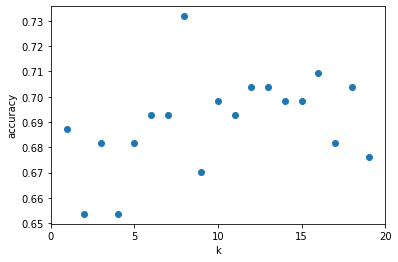

In [79]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()
#this helps be see that around 6/7 for n_neighbors has the highest accuracy...

### Exercise 6)
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Between the accuracy score dataframe I made and the scatterplot of accuracy, I would say that number 6 performs best.

    - It has a low difference of .02(rounded), meaning the Test and Validate are fairly close
        - (also means no overfitting)
    - It still is over our baseline of 0.62
    - It is still at a great training point to move forward with testing the data

### Exercise 7)
Which model performs best on our out-of-sample data from validate?

In [80]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.81


# Logistic Regression Exercises

### Exercise 1)
Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
#note: Baseline reminder :::::: 0.64

train['baseline_prediction'] = 0
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
baseline_accuracy

0.6164658634538153

In [83]:
#found a duplicated column needing to be dropped
train = train.loc[:,~train.columns.duplicated()]

In [84]:
# split into train, validate, test
train, validate, test = train_validate_test_split(train, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived','sibsp','parch','alone','sex_male','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp','parch','alone','sex_male','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp','parch','alone','sex_male','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_test = test.survived

### Making the Model:

In [85]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')

- Fit the Model:

In [86]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

- Feature Importance: looking at each column to determine the important/weight of each feature using coefficients

In [87]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.90331246 -0.01994638  0.00570021]]
Intercept: 
 [1.97375021]


In [88]:
#to show what each column the coefficients are referring to:
X_train.columns

Index(['pclass', 'age', 'fare'], dtype='object')

- Making Predictions on whether or not a passenger survived or not

In [89]:
y_pred = logit.predict(X_train)

- Estimating Probability of not surviving based on each observation

In [90]:
y_pred_proba = logit.predict_proba(X_train)

### Evaluating model:

In [91]:
#Accuracy of the models logistic classifier
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.71


### <i><p style="color:teal;"> TAKE AWAY: Yes! This first model's accuracy is already higher than our baseline </i></p>

- Classification Report:

In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       171
           1       0.68      0.48      0.56       107

    accuracy                           0.71       278
   macro avg       0.70      0.67      0.67       278
weighted avg       0.71      0.71      0.70       278



### <i><p style="color:teal;"> TAKE AWAY: these are pretty good numbers. let's look at a new model with another C strength (remember, smaller values with C specify stronger regularization)
</i></p>

### Exercise 2)
Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [93]:
#rename X_train and y_train to the drop any columnsn not wanted (this time keep sex_male!)

X_train = train.drop(columns=['survived','sibsp','parch','alone','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp','parch','alone','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp','parch','alone','embark_town_Queenstown','embark_town_Southampton','embark_town_Southhampton','baseline_prediction'])
y_test = test.survived

In [97]:
#creating a 'for-loop' that can change the C value

for i in range(0,1):
    # Make the model
    logit = LogisticRegression(C=i, 
                               random_state=123, 
                               intercept_scaling=1, 
                               solver='lbfgs')

    # Fit the model (on train and only train)
    logit.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = logit.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest model with max depth of {i}")
    print(pd.DataFrame(report))
    print()

ZeroDivisionError: float division by zero